In [52]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Motivating qn

- Let X and Y be independent continuous variables. What is the distribution of their sum $T = X + Y$?

- This lesson will cover convolutions of 2 independent PDFs, and [this](https://www.youtube.com/watch?v=d_qvLDhkg00) 3B1B video is probably the best explainer 

## Theory

- **Theorem 45.1 (Sum of Independent Random Variables)**: Let X and Y be independent continuous random variables. Then, the p.d.f. of $T = X + Y$ is the convolution of the p.d.f.s of X and Y is $$f_{T} = \int_{y=t-x} \int_{x=-\inf}^{\inf} f_X \cdot f_Y$$. 

    - This isn't anything very new. In fact, we have already made use of this in a few earlier sections (e.g. Example 41.1), where we found that the PDF from adding 2 independent exponentially-distributed random variables is simply the integral of the product of the marginal PDF; $$f(T) = f(X) \cdot f(Y)$$

    - If the intuition for this is still eluding you, consider this table from Theorem 21.1 where we consider the discrete case
        - Basically, for T = X + Y, we highlight all the values of (x,y) that meet this condition
        - The PDF of T is thus the distribution over the highlighted cells
        - Each cell is simply the product of $PMF_X$ and $PMF_Y$
    ![Alt text](image.png)

- Let's try to prove the theorem above 
$$\begin{align}
    F_T(t) &= P(T \le t) \\
    &= P(X+Y \le t) \\
    &= \int_{x=-\inf}^{\inf} \int_{y=-\inf}^{t-x} f(x,y) \text{ } dy dx \\
    &= \int_{x=-\inf}^{\inf} \int_{y=-\inf}^{t-x} f_X(x) f_Y(y) \text{ } dy dx \\
    &= \int_{x=-\inf}^{\inf} f_X(x) \int_{y=-\inf}^{t-x} f_Y(y) \text{ } dy dx \\
    &= \int_{x=-\inf}^{\inf} f_X(x) F_Y(t-x) \text{ } dx \\ \\

    f_T(t) &= \frac{d}{dt} F_T(t) dt \\
    &= \frac{d}{dt} \int_{x=-\inf}^{\inf} f_X(x) F_Y(t-x) \text{ } dx \\
    &= \int_{x=-\inf}^{\inf} \frac{d}{dt} (f_X(x) F_Y(t-x)) \text{ } dx \\
    &= \int_{x=-\inf}^{\inf} [ \frac{d}{dt} f_X(x) \cdot F_Y(t-x) ] \cdot [ f_X(x) \cdot \frac{d}{dt} F_Y(t-x) ] \text{ } dx & \text{by product rule } \\
    &= \int_{x=-\inf}^{\inf} f_X(x) \cdot \frac{d}{dt} F_Y(t-x) \text{ } dx & \frac{d}{dt} f_X(x) = 0 \\
    &= \int_{x=-\inf}^{\inf} f_X(x) \cdot f_Y(t-x) \cdot \frac{d(t-x)}{dt} \text{ } dx & \text{by chain rule } \\
    &= \int_{x=-\inf}^{\inf} f_X(x) \cdot f_Y(t-x) \cdot 1 \text{ } dx \\
\end{align}$$

#### Example 45.1 (Sum of Independent Uniforms)

-  Let X and Y be independent $\text{Uniform}(a=0, b=1)$ random variables. What is the p.d.f. of $T = X + Y$?
    - Let's remove 1 source of misunderstanding. Just because X and Y are both uniform, it DOES NOT mean that T is also uniform
        - Simple example is rolling 2 fair dice. Each dice is uniformly distributed, but the sum of the die rolls will not be uniform!
        - This is becuse there are more ways to get a 7 than there are to get a 2
    - In this case, since X and Y must be between 0 and 1, T must be between 0 and 2
    - $$\begin{align}
        f_X(x) &= \begin{Bmatrix}
                1 & 0 \lt x \lt 1 \\
                0 & \text{otherwise}
                \end{Bmatrix} \\

        f_Y(y) &= \begin{Bmatrix}
                1 & 0 \lt y \lt 1 \\
                0 & \text{otherwise}
                \end{Bmatrix} \\

        f_T(t) &= f_T(x+y), \forall 0 \lt t \lt 2
        \end{align}$$
    
- Using the support X, Y and T above, we can write the convolution of $f(X)$ and $f(Y)$ as the following integral. The hard part is setting up the integral, so let's look into how we can think through setting of limits in the integral
    - From **Theorem 45.1**, we see that we can rewrite the integral of $f_T(t)$ in terms of $X$ alone, since $Y$ is wholly determined by the value of $X$ for a given $T$
    - However, the range of values that $X$ can take on differs depending on $T$
    - If $0 \lt t \lt 1$
        - Write all limits in terms of X
            1. $x \gt 0$ by definition
            2. $x \lt t$
                - If $x \gt t$, then $t-x \lt 0$. 
                - Since $y = t-x$, this means that $y \lt 0$
                - This is a contradiction, because $0 \lt y \lt 1$
                - e.g. if $t = 0.5$, and $x = 0.6$, then $y = -0.1$, which is outside the support of $y$
            3. $y \gt 0$ by definition. Since $y = t - x$:
                - $t-x \gt 0 \\ x \lt t$ 
            4. $y \lt t$. Since $y = t - x$:
                - $t-x \lt t$
                - $x \gt 0$
        - Considering these limits in unison
            - Combining 1. and 4., we know that $x \gt 0$
            - Combining 2. and 3., we know that $x \lt t$
        - Hence, when $0 \lt t \lt 1$
            - $$\begin{align}
                f_T(t) &= \int_{x=0}^{t} f_X(x) \cdot f_Y(t-x) dx \\
                &= \int_{x=0}^{t} 1 dx \\
                &= t
                \end{align}$$
    - If $1 \lt t \lt 2$
        - Limits
            1. $x \lt 1$ by definition
            2. $y \lt 1$ by definition. Since $y = t-x$
                - $t-x \lt 1$
                - $x \gt t-1$
            3. $x \gt 0$ by definition
            4. $y \gt 0$ by definition. Since $y = t-x$
                - $t-x \gt 0$
                - $x \lt t$
        - Putting together
            - Combining 1. and 4.
                - when $1 \lt t \lt 2$, $x \lt 1$ is more restrictive than $x \lt t$. Hence, we take the upper limit of $x$ at $x \lt 1$
            - Combining 2. and 3.
                - when $1 \lt t \lt 2$, $x \gt t-1$ is more restrictive than $x \gt 0$. Hence, we take lower limit of $x$ at $x \gt t-1$
        - when $1 \lt t \lt 2$
            - $$\begin{align}
                f_T(t) &= \int_{x=t-1}^{1} f_X(x) \cdot f_Y(y) dx \\
                &= \int_{x=t-1}^{1} 1 dx \\
                &= 1 - t + 2 \\
                &= 2 - t
                \end{align}$$

- As such, the distribution of $T = X+Y$ is $$f_T(t) = \begin{Bmatrix} t & 0 \lt t \lt 1 \\ 2-t & 1 \lt t \lt 2 \\ 0 & \text{otherwise} \end{Bmatrix}$$

- Another way to think about this is to plot the PDFs of both $f_X(x)$ and $f_X(t-x)$
    - We know that the PDFs $f_X(x)=1$ and $f_Y(y)=1$ because of uniform distribution
    - Essentially, we want to find the area that falls under both $f_X(x)$ and $f_X(t-x)$
    - We'll start with T = 0, and gradually increase the value of T
    - As t increases, the overlap increases up until t = 1. Then it starts to decrease again
    - The overlapping area is $(t-0)*1 = t$ when $0 \lt t \lt 1$, since it is a rectangle with height 1 and base t
    - The overlapping area is $(1 - (t - 1))*1 = 2 - t$ when $1 \lt t \lt 2$, since it is a rectangle with height 1 and base 2-t

In [17]:
xvals = np.arange(-2,2,0.01)
t = np.arange(0,2,0.1)
fx = np.where((0 < xvals) & (xvals < 1), 1, 0)

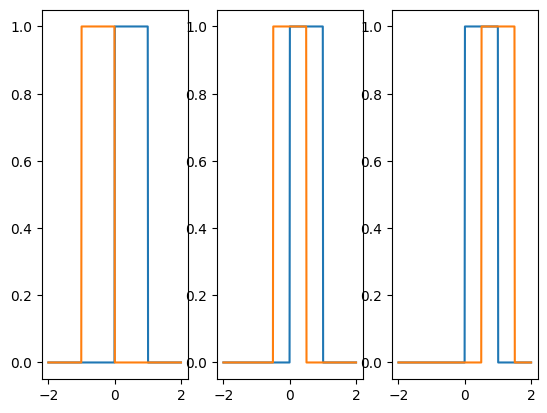

In [44]:
plt.subplot(131)
neg_fx = np.where((0 < -xvals) & (-xvals < 1), 1, 0)
plt.plot(xvals, fx)
plt.plot(xvals, t[0] + neg_fx)

plt.subplot(132)
neg_fx = np.where((0 < -xvals+t[5]) & (-xvals+t[5] < 1), 1, 0)
plt.plot(xvals, fx)
plt.plot(xvals, t[0] + neg_fx)

plt.subplot(133)
neg_fx = np.where((0 < -xvals+t[15]) & (-xvals+t[15] < 1), 1, 0)
plt.plot(xvals, fx)
plt.plot(xvals, t[0] + neg_fx)

- Graphing out the PDF of T $$f_T(t) = \begin{Bmatrix} t & 0 \lt t \lt 1 \\ 2-t & 1 \lt t \lt 2 \\ 0 & \text{otherwise} \end{Bmatrix}$$
- Ths is why the sum of 2 independent uniform random variables is known as the **triangle distribution**

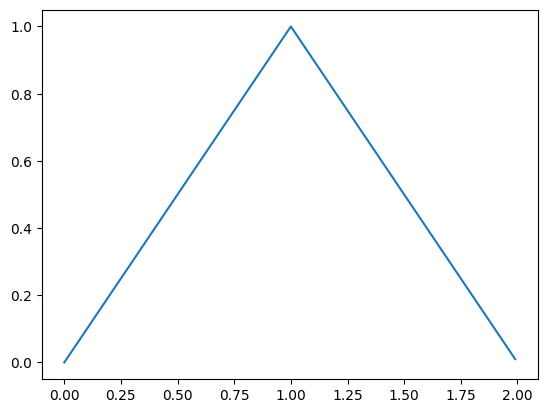

In [47]:
tvals = np.arange(0,2,0.01)
ft = np.where((0 <= tvals) & (tvals <= 1), tvals, 2 - tvals)
plt.plot(tvals, ft)

#### Example 45.2 (Distribution of Arrival Times)

- In example 43.3 and 44.3, we derived the expectation and standard deviation of $S_r$, where $S_r = T_1 + T_2 + ... T_r$, and $T_i$ represents arrival times from an exponential distribution with parameter $\lambda$
    - $E[S_r] = \frac{r}{\lambda}$ 
    - $SD[S_r] = \frac{\sqrt{r}}{\lambda}$ 

- Since interarrival times are all independent in an exponential distribution, let's try to derive the joint distribution. 

- To start with, assume $r=2$. As such, $S_2 = T_1 + T_2$

$$\begin{align}
    f_{S_2}(t) &= \int_{T_1}^{} \int_{T_2}^{} f(T_1) \cdot f(T_2) \\
    &= \int_{T_1}^{} f_T(T_1) \cdot f(t - T_1) \\
    &= \int_{T_1}^{} \lambda e^{-\lambda T_1} \cdot \lambda e^{-\lambda (t-T_1)} & 0 \lt (T_1, T_2) \lt \inf
\end{align}$$

- We run into the same problem as example 45.1; how can we determine the limits of integration for $t_1$? Let's apply the same approach:
    - Limits
        1. $T_1 \gt 0$ by definition of exponential distribution
        2. $T_2 \gt 0$ by definition of exponential distribution
            - $T_2 = t - T_1$
            - $t - T_1 \gt 0$
            - $T_1 \lt t$
        3. $T_1 \lt \inf$ by definition of exponential distribution
        4. $T_2 \lt \inf$ by definition of exponential distribution
            - $t - T_1 \lt \inf$
            - $t - \inf \lt T_1 $
            - $T_1 \gt - \inf$
    - Combining the above
        - From 1. and 4., $T_1 \gt 0$ is the more restrictive condition
        - From 2. and 3., $T_1 \lt t$ is the more restrictive condition

$$\begin{align}
    f_{S_2}(t) &= \int_{T_1}^{} \lambda e^{-\lambda T_1} \cdot \lambda e^{-\lambda (t-T_1)} & 0 \lt (T_1, T_2) \lt \inf \\
    &= \int_{T_1=0}^{t} \lambda^2 e^{-\lambda t} \\
    &= \lambda^2 e^{-\lambda t} \int_{T_1=0}^{t} 1 dT_1 \\
    &= \lambda^2 e^{-\lambda t} t \\
\end{align}$$


- Extending the above, what happens when we want to find $f_{S_3}(t)$?
    - Earlier, we said that 
        - $$f_{S_2}(t) = \int \int f(T_1) \cdot f(T_2) \text{ } = \lambda^2 e^{-\lambda t} t$$
    - By the same logic
        - $$f_{S_3}(t) = \int \int \int f(T_1) \cdot f(T_2) \cdot f(T_3) \text{ }$$
    - Instead of doing a triple integration, let's make use of the fact that $T_3$ is independent of $S_2 = T_1 + T_2$. So
        - $$\begin{align} 
            f_{S_3}(t) &= \int \int f(S_2) \cdot f(T_3) \\ 
            &= \int \lambda^2 e^{-\lambda S_{2}} S_2 \cdot \lambda e^{-\lambda (t-S_2)}
            \end{align}$$
    - Defining limits
        1. $S_2 \gt 0$
        2. $T_3 \gt 0$
            - $T_3 = t - S_2$
            - $t - S_2 \gt 0$
            - $S_2 \lt t$
        3. $S_2 \lt \inf$
        4. $T_3 \lt \inf$
            - $t - S_2 \lt \inf$
            - $S_2 \gt -\inf$
    - Combining 
        - 1. and 4. imply that $S_2 \gt 0$
        - 2. and 3. imply that $S_2 \lt t$
    

$$\begin{align}
    f_{S_3}(t) &= \int_{S_2 = 0}^{t} \lambda^2 e^{-\lambda S_{2}} S_2 \cdot \lambda e^{-\lambda (t-S_2)} dS_2\\
    &= \int_{S_2 = 0}^{t} \lambda^3 e^{-\lambda t} S_2 dS_2\\
    &= \lambda^3 e^{-\lambda t} \int_{S_2 = 0}^{t} S_2 dS_2\\
    &= \lambda^3 e^{-\lambda t} [\frac{S_2^2}{2}]^t_0 \\
    &= \lambda^3 e^{-\lambda t} \frac{t^2}{2} \\
    &= \frac{\lambda^3}{2} e^{-\lambda t} t^2 \\
\end{align}$$



- Generalising

$$\begin{align}
    f_{S_r}(t) &= \frac{\lambda^r}{(r-1)!} \cdot e^{-\lambda t} \cdot t^{r-1}
\end{align}$$

- This is precisely the **Gamma distribution**. In other words, the sum of independent exponential distribution will converge to a Gamma distribution

- Let's plot these below

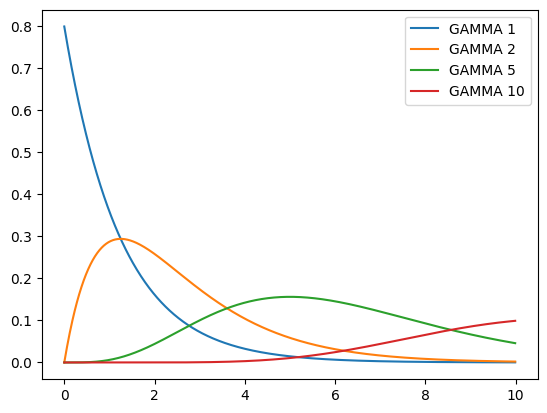

In [67]:
G_LAMBDA = 0.8
tvals = np.arange(0, 10, 0.01)

def gamma_pdf(g_lambda, r, x):
    val = (g_lambda**r / math.factorial(r-1)) * np.exp(-g_lambda * x) * x**(r-1)
    return val

fs1 = gamma_pdf(g_lambda=G_LAMBDA, r=1, x=tvals)
fs2 = gamma_pdf(g_lambda=G_LAMBDA, r=2, x=tvals)
fs5 = gamma_pdf(g_lambda=G_LAMBDA, r=5, x=tvals)
fs10 = gamma_pdf(g_lambda=G_LAMBDA, r=10, x=tvals)
plt.plot(tvals, fs1, label='GAMMA 1')
plt.plot(tvals, fs2, label='GAMMA 2')
plt.plot(tvals, fs5, label='GAMMA 5')
plt.plot(tvals, fs10, label='GAMMA 10')
plt.legend()